In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris(return_X_y=True, as_frame=True)

In [3]:
sl = iris[0]["sepal length (cm)"]

In [4]:
sl = sl.to_numpy()

In [5]:
sns.set()

In [6]:
n_sl = len(sl)
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_sl) 
n_bins = int(n_bins)

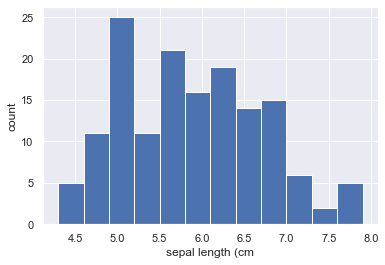

In [7]:
_ = plt.hist(sl, bins = n_bins)
_ = plt.xlabel("sepal length (cm")
_ = plt.ylabel("count")
plt.show()

In [8]:
df = pd.read_csv("iris.csv")

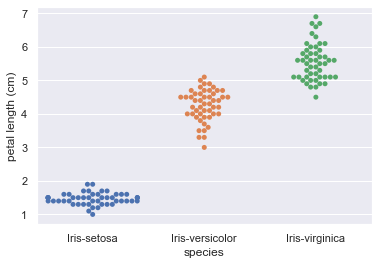

In [9]:
_ = sns.swarmplot(x = "class", y = "petallength", data = df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

# Empirical cumulative distribution function (ECDF)

In [10]:
def ecdf(data):
    """Compute Empirical cumulative distribution function (ECDF) 
       for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

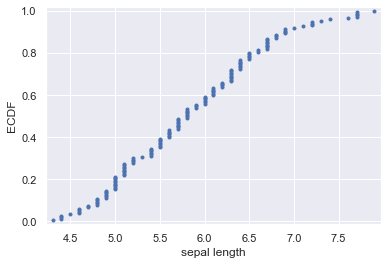

In [11]:
x_vers, y_vers = ecdf(sl)
_ = plt.plot(x_vers, y_vers, marker = ".", linestyle = "none")
_ = plt.xlabel("sepal length")
_ = plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

    #### 60% of the sepals have a 6.0cm length or less
    #### 80% of the sepals are 6.5cm long or less

In [12]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
#ECDFs also allow you to compare two or more distributions
setosa = df.loc[(df["class"] == "Iris-setosa")]
versicolor = df.loc[(df["class"] == "Iris-versicolor")]
virginica = df.loc[(df["class"] == "Iris-virginica")]

In [14]:
setosa_pl = setosa.petallength.to_numpy()
versicolor_pl = versicolor.petallength.to_numpy()
virginica_pl = virginica.petallength.to_numpy()

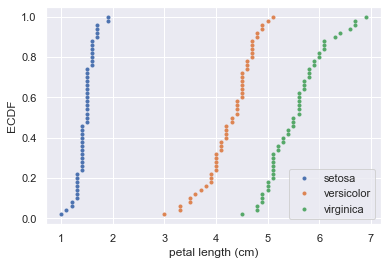

In [15]:
x_set, y_set = ecdf(setosa_pl)
x_vers, y_vers = ecdf(versicolor_pl)
x_virg, y_virg = ecdf(virginica_pl)

_= plt.plot(x_set, y_set, marker = ".", linestyle ="none")
_= plt.plot(x_vers, y_vers, marker = ".", linestyle ="none")
_= plt.plot(x_virg, y_virg, marker = ".", linestyle ="none")

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

# SUMMARY STATISTICS: SAMPLE MEAN AND MEDIAN

In [16]:
#mean
np.mean(versicolor_pl)

4.26

In [17]:
#median
np.median(versicolor_pl)

4.35

In [18]:
#std dev
print(np.std(versicolor_pl))
#or
print(np.sqrt(np.var(versicolor_pl)))

0.4651881339845203
0.4651881339845203


In [19]:
#percentile
percentiles = np.array([25,50, 75])
vers_ptiles = np.percentile(versicolor_pl, percentiles)

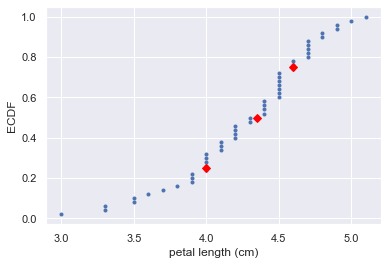

In [20]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_= plt.plot(vers_ptiles, percentiles / 100, marker ="D", color = "red", linestyle = "none")
plt.show()


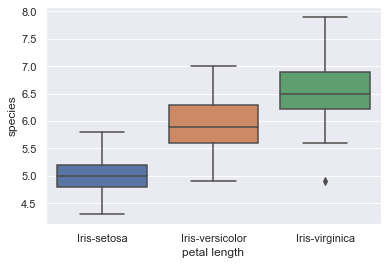

In [21]:
_ = sns.boxplot(x='class', y='sepallength', data=df)
_ = plt.xlabel('petal length')
_ = plt.ylabel('species')
plt.show()

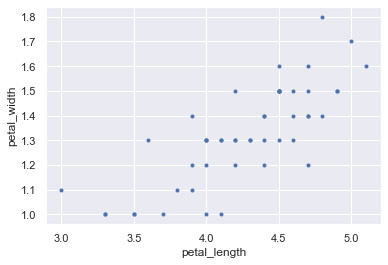

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [22]:
#covariance and pearson correlation coefficient = covariance / (std of x)(std of y)

# Make a scatter plot
_= plt.plot(versicolor.petallength, versicolor.petalwidth, marker = ".", linestyle = "none")


# Label the axes
_= plt.xlabel ("petal_length")
_= plt.ylabel ("petal_width")

# Show the result
plt.show()
print(np.cov(versicolor.petallength, versicolor.petalwidth))
print(np.cov(versicolor.petallength, versicolor.petalwidth)[0,1])

In [23]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor.petallength,versicolor.petalwidth)


# Print the result
print("correlation of: {}".format(r))

correlation of: 0.7866680885228169


# Probabilistic logic and statistical inference

In [24]:
#Blaise pascal 17th century
#Random number generators and hacker statistics


In [25]:
#Bernoulli trial a situation where you have only 2 options (success or failure)
np.random.random() # generate numbers between 0 and 1

0.8626992895286488

In [28]:
##Simulating 4 coin flips
np.random.seed(42) # for code reproducibility
random_numbers = np.random.random(size = 4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [29]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [30]:
np.sum(heads)

1

In [34]:
#What is the probability of getting all 4 heads in  10,000 trials
all_heads = 0
for i in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        all_heads += 1
print("the probability of getting all 4 heads in a given trial is: {}".format(all_heads/10000))

the probability of getting all 4 heads in a given trial is: 0.0601


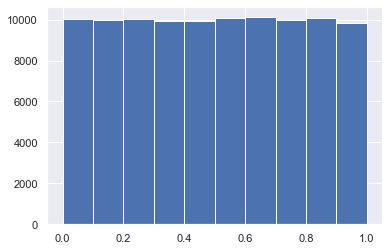

In [37]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()
# the following plot shows that every number from 0 to 1 have almost the exact same probability of ocurring

In [38]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

In [41]:
perform_bernoulli_trials(10000, .2)

2037

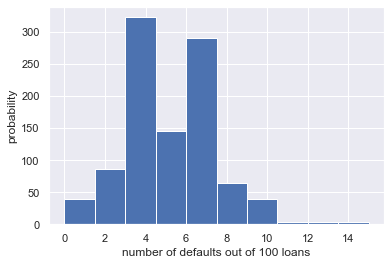

In [43]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()